In [31]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np
from astropy.table import Table

n = 100
ra = np.random.uniform(0, 0.1, n)
dec = np.random.uniform(-0.05, 0.05, n)

true = Table({'ra': ra, 'dec': dec})
pred = Table({'ra': ra+np.random.normal(0, 0.1, n), 'dec': dec+np.random.normal(0, 0.1, n)})


In [15]:
pos_true = np.vstack([ra, dec]).T
pos_pred = np.vstack([pred['ra'].value, pred['dec'].value]).T

In [28]:
from scipy.spatial import KDTree
tree_true = KDTree(pos_true) # kdtree 
tree_pred = KDTree(pos_pred)

In [33]:
matches = tree_true.query_ball_tree(tree_pred, r=0.01)

In [34]:
matches

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [48, 70],
 [14],
 [],
 [],
 [97],
 [29],
 [],
 [],
 [],
 [],
 [],
 [65, 85],
 [],
 [],
 [],
 [],
 [29],
 [74],
 [14],
 [],
 [],
 [29],
 [21],
 [37, 97],
 [],
 [65, 85],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [55],
 [],
 [],
 [21],
 [],
 [],
 [94],
 [],
 [48, 85],
 [],
 [74],
 [48, 70],
 [37, 97],
 [],
 [33, 74],
 [99],
 [94],
 [],
 [55],
 [33],
 [14],
 [94],
 [48, 85],
 [],
 [],
 [],
 [33],
 [],
 [],
 [],
 [],
 [35],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [55],
 [],
 [85],
 [],
 [],
 [],
 [],
 [],
 [55],
 [],
 [65],
 [],
 [48],
 [],
 [],
 [],
 [],
 []]

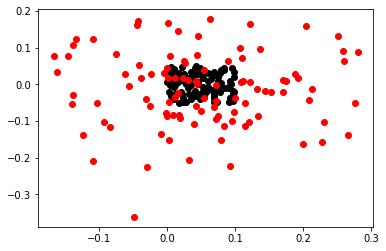

In [32]:
plt.scatter(pos_true[:, 0], pos_true[:, 1], c='k')
plt.scatter(pos_pred[:, 0], pos_pred[:, 1], c='r')


In [ ]:
from astropy.table import Table
def count_matches(match_info):
    """For each group the number of matches in that group"""
    
    _, counts = np.unique(match_info['group_id'], return_counts=True)
    return counts - 1